In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('emails.csv')

In [26]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df['Email No.'].is_unique

True

In [28]:
df = df.drop(columns=['Email No.'])

In [29]:
def plot_dc(data, x_labels=None, y_label='Value Counts', title='Amount of Spam in Dataset'):

    categories = list(data.keys())
    values = list(data.values())
    
    if x_labels == None:
        x_labels=categories
        
    x = range(len(categories))
    
    plt.figure(figsize=(4, 4))
    bars = plt.bar(x, values, color='skyblue')

    #plt.xlabel('Categories')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(x, x_labels)  # Set x-tick labels to dictionary keys

    # Annotate bars with their height values
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                     ha='center', va='bottom', fontsize=10)

    add_labels(bars)

    plt.tight_layout()
    plt.show()

In [30]:
percent_spam = {k:round((v/len(df)),2) for (k,v) in df['Prediction'].value_counts().to_dict().items()}

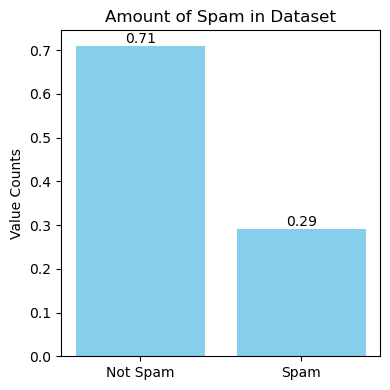

In [31]:
plot_dc(percent_spam, x_labels = ['Not Spam', 'Spam'])

In [32]:
X= df.drop(columns='Prediction')
y= df['Prediction']

In [33]:
X['word_count'] = X.sum(axis=1)

In [34]:
def count_values_above_zero(row):
    return (row > 0).sum()

X['num_unique_words'] = X.apply(count_values_above_zero, axis=1)

In [35]:
spam_df = df[df['Prediction'] == 1]
spam_X = X.loc[spam_df.index]

ham_df = df[df['Prediction'] == 0]
ham_X = X.loc[ham_df.index]

In [36]:
def plot_mean(df1, df2, column_name, labels=['spam', 'ham']):
    mean_df1 = df1[column_name].mean()
    mean_df2 = df2[column_name].mean()
    
    means = pd.DataFrame({
        'DataFrame': labels,
        'Mean': [mean_df1, mean_df2]
    })
    
    ax = means.plot(kind='barh', x='DataFrame', y='Mean', figsize=(10, 6), color=['orange', 'skyblue'], legend=False)
    
    plt.title(f'Average {column_name}')
    plt.xlabel('Mean Value')
    plt.ylabel('DataFrame')
    
    for index, value in enumerate(means['Mean']):
        ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')
    
    lowest_mean = min([mean_df1, mean_df2])
    highest_mean = max([mean_df1, mean_df2])
    difference = highest_mean - lowest_mean
    
    plt.xlim(lowest_mean - difference/3, highest_mean + difference/3)
    plt.show()

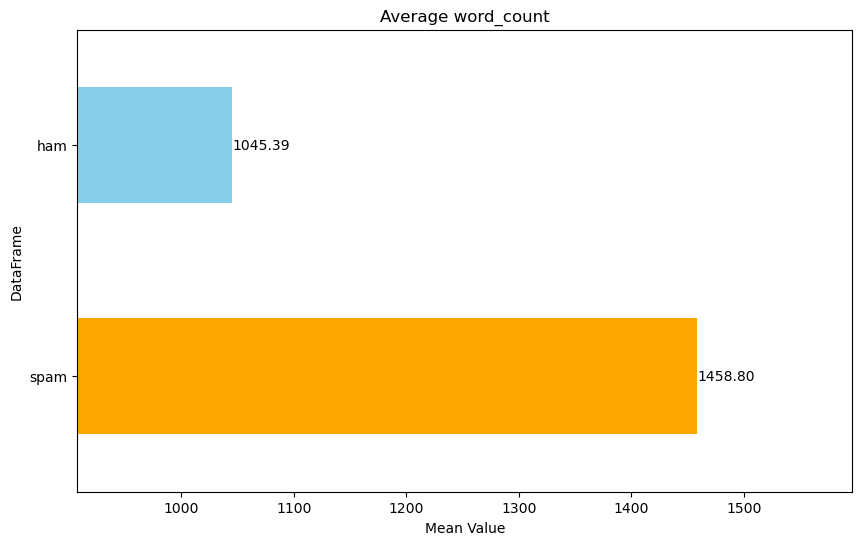

In [37]:
plot_mean(spam_X, ham_X, 'word_count')

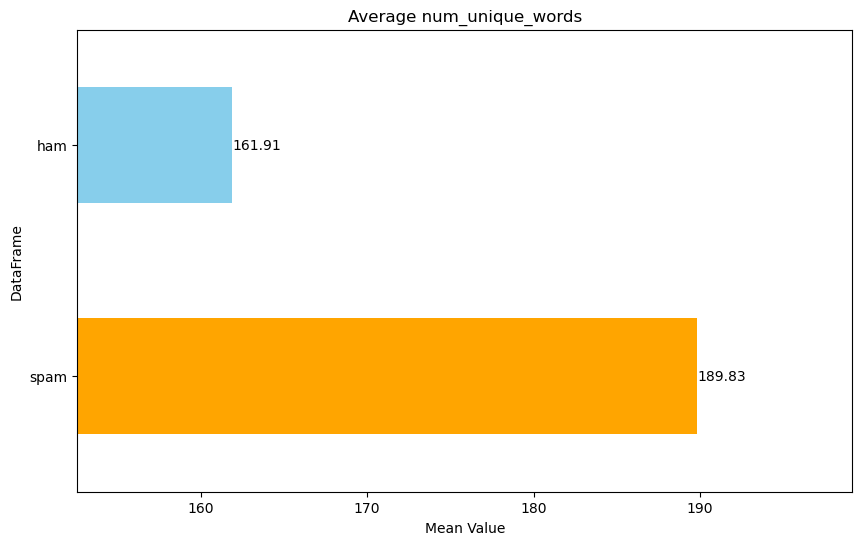

In [38]:
plot_mean(spam_X, ham_X, 'num_unique_words')

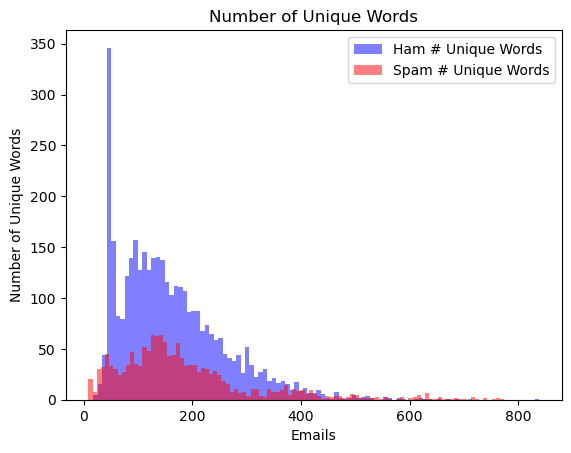

In [39]:
plt.hist(ham_X.num_unique_words,bins=100, alpha=0.5, label='Ham # Unique Words', color='blue')
plt.hist(spam_X.num_unique_words, bins=100,alpha=0.5, label='Spam # Unique Words', color='red')

plt.title('Number of Unique Words')
plt.xlabel('Emails')
plt.ylabel('Number of Unique Words')

plt.legend()

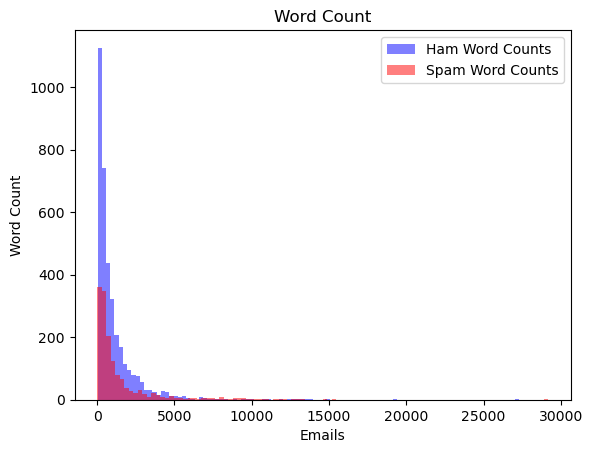

In [40]:
plt.hist(ham_X.word_count, bins=100, alpha=0.5, label='Ham Word Counts', color='blue')
plt.hist(spam_X.word_count, bins=100, alpha=0.5, label='Spam Word Counts', color='red')

plt.title('Word Count')
plt.xlabel('Emails')
plt.ylabel('Word Count')

plt.legend()

Spam and Ham emails both have similar distributions of # of unique words. There is just more Ham emails in the dataset than Spam emails.

In [41]:
print('Maximum Num of Unique Words in Spam Emails: ' + str(spam_X.num_unique_words.max()))
print('Minimum Num of Unique Words in Spam Emails: ' + str(spam_X.num_unique_words.min()))
print('Mean Num of Unique Words in Spam Emails: ' + str(spam_X.num_unique_words.mean()))
print('\n')
print('Maximum Num of Unique Words in Ham Emails: ' + str(ham_X.num_unique_words.max()))
print('Minimum Num of Unique Words in Ham Emails: ' + str(ham_X.num_unique_words.min()))
print('Mean Num of Unique Words in Spam Emails: ' + str(ham_X.num_unique_words.mean()))

Maximum Num of Unique Words in Spam Emails: 774
Minimum Num of Unique Words in Spam Emails: 9
Mean Num of Unique Words in Spam Emails: 189.834


Maximum Num of Unique Words in Ham Emails: 839
Minimum Num of Unique Words in Ham Emails: 18
Mean Num of Unique Words in Spam Emails: 161.90958605664488


In [43]:
print('Maximum Word Count in Spam Emails: ' + str(spam_X.word_count.max()))
print('Minimum Word Count in Spam Emails: ' + str(spam_X.word_count.min()))
print('Mean Word Count in Spam Emails: ' + str(spam_X.word_count.mean()))
print('\n')
print('Maximum Word Count in Ham Emails: ' + str(ham_X.word_count.max()))
print('Minimum Word Count in Ham Emails: ' + str(ham_X.word_count.min()))
print('Mean Word Count in Spam Emails: ' + str(ham_X.word_count.mean()))

Maximum Word Count in Spam Emails: 29178
Minimum Word Count in Spam Emails: 8
Mean Word Count in Spam Emails: 1458.7986666666666


Maximum Word Count in Ham Emails: 27319
Minimum Word Count in Ham Emails: 21
Mean Word Count in Spam Emails: 1045.3918845315904
